## Explorando FMA (_A Dataset For Music Analysis_)

Neste notebook, começaremos a estudar o processamento de uma quantidade maior de audios. O dataset completo contém aproximadamente 100k músicas inteiras de 161 gêneros musicais diferentes. Os dados que utilizaremos podem ser baixados através [deste link](https://os.unil.cloud.switch.ch/fma/fma_small.zip). Através dele, obtemos um subconjunto do dataset completo, que contém trechos de 30s de 8000 músicas, totalizando 8 gêneros musicais diferentes.

Aqui, focaremos na pasta **001** deste arquivo zip. A coleta e estruturação deste conjunto de dados encontra-se documentada [neste repositório](https://github.com/mdeff/fma).

In [1]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display
import utils
import os

In [36]:
folder = '001'

df_signals = pd.DataFrame()
df_signals['signal'] = ''

for file in os.listdir(folder):
    signal = librosa.load('{}/{}'.format(folder, file))[0]
    title = file.split('.')[0]
    title = int(title)
    
    # guardando o nome do arquivo e seu sinal
    df_signals.at[title, 'signal'] = signal
    
df_signals.index.names = ['track_id']

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.8/dist-packages/librosa/cor

In [37]:
df_signals

,signal
track_id,
1681,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1073,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1735,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1427,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1649,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1195,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1259,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1510,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1736,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Dando uma olhada na variabilidade de amplitude dentre os elementos do nosso corpus:

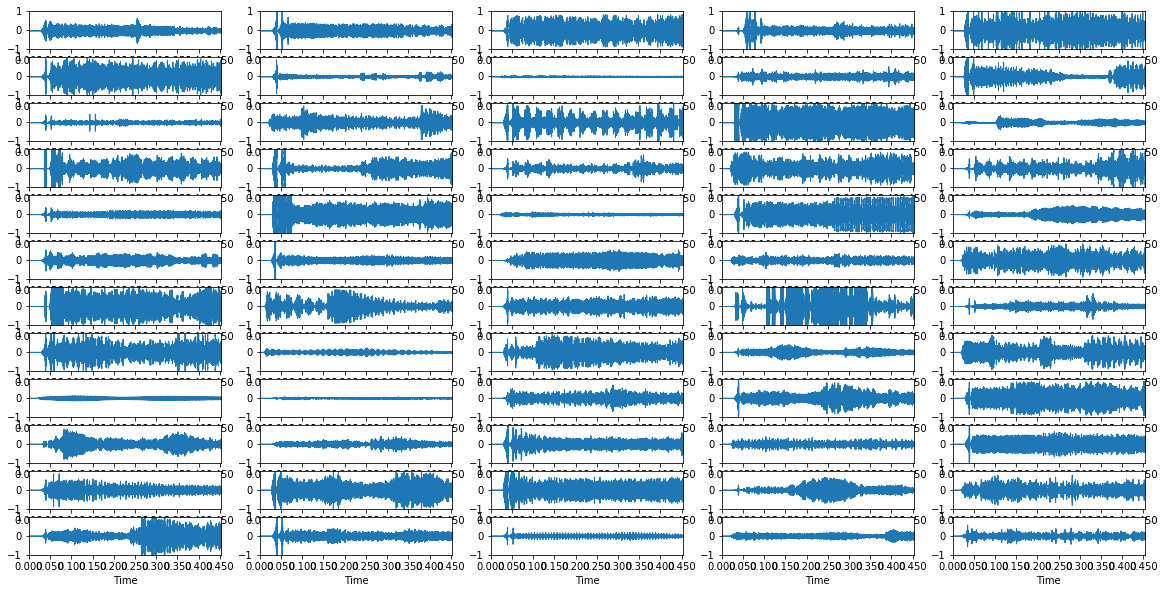

In [22]:
plt.figure(figsize=(20, 10))
for i, x in enumerate(list(df_signals['signal'])):
    plt.subplot(12, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

Agora, as FFT:

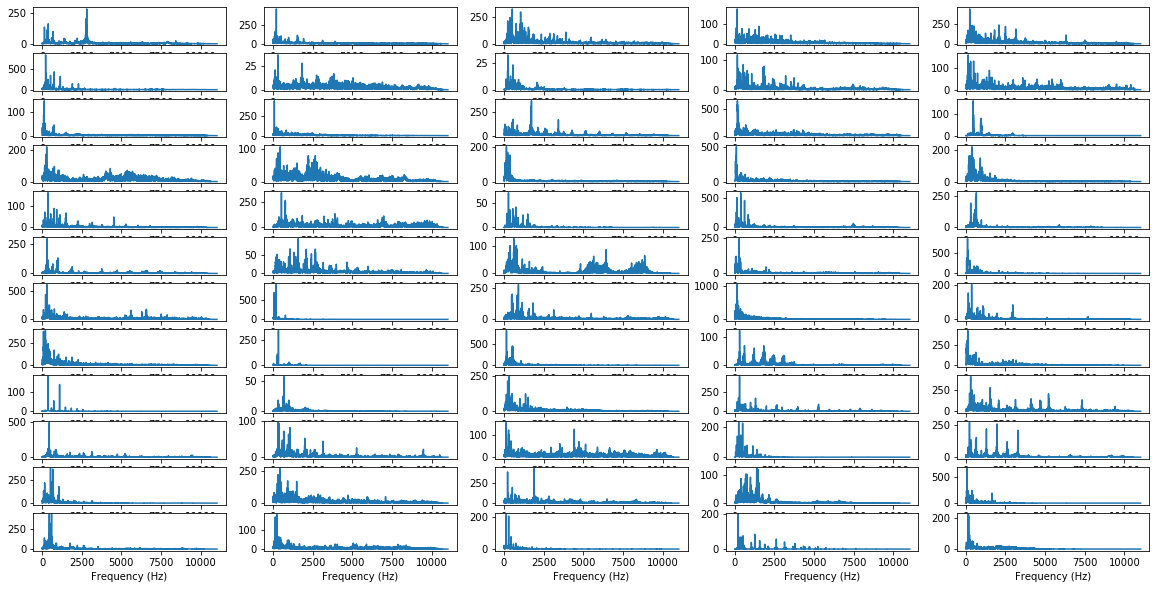

In [26]:
plt.figure(figsize=(20, 10))
for i, x in enumerate(list(df_signals['signal'])):
    plt.subplot(12, 5, i+1)
    X = scipy.fft(x[:8192])
    X_mag = numpy.absolute(X)
    sr = 22050
    f = numpy.linspace(0, sr, 8192)
    plt.plot(f[:4096], X_mag[:4096])
    plt.xlabel('Frequency (Hz)')

Agora, vamos começar a olhar para o gênero de cada audio. Para fazer o download dos gêneros das músicas que estamos analisando, basta acessar [este link](https://os.unil.cloud.switch.ch/fma/fma_metadata.zip) e extrair o arquivo _tracks.csv_.

Carregando este arquivo:

In [27]:
tracks = pd.read_csv('tracks.csv', index_col=0, header=[0, 1])
tracks.head()

album                                                     \
         comments         date_created        date_released engineer   
track_id                                                               
2               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
3               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
5               0  2008-11-26 01:44:45  2009-01-05 00:00:00      NaN   
10              0  2008-11-26 01:45:08  2008-02-06 00:00:00      NaN   
20              0  2008-11-26 01:45:05  2009-01-06 00:00:00      NaN   

                                                                          \
         favorites id                                information listens   
track_id                                                                   
2                4  1                                    <p></p>    6073   
3                4  1                                    <p></p>    6073   
5                4  1                                    <p></p>    6073   
10               4  6                                        NaN   47632   
20               2  4  <p> "spiritual songs" from Nicky Cook</p>    2710   

                        ...       track                         \
         producer tags  ... information interest language_code   
track_id                ...                                      
2             NaN   []  ...         NaN     4656            en   
3             NaN   []  ...         NaN     1470            en   
5             NaN   []  ...         NaN     1933            en   
10            NaN   []  ...         NaN    54881            en   
20            NaN   []  ...         NaN      978            en   

                                                                              \
                                                    license listens lyricist   
track_id                                                                       
2         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1293      NaN   
3         Attribution-NonCommercial-ShareAlike 3.0 Inter...     514      NaN   
5         Attribution-NonCommercial-ShareAlike 3.0 Inter...    1151      NaN   
10        Attribution-NonCommercial-NoDerivatives (aka M...   50135      NaN   
20        Attribution-NonCommercial-NoDerivatives (aka M...     361      NaN   

                                                 
         number publisher tags            title  
track_id                                         
2             3       NaN   []             Food  
3             4       NaN   []     Electric Ave  
5             6       NaN   []       This World  
10            1       NaN   []          Freeway  
20            3       NaN   []  Spiritual Level  

[5 rows x 52 columns]

Concatenando as informações presentes no arquivo csv (metadados) com o sinal:

In [39]:
df_complete = pd.concat([df_signals, tracks], axis=1, join='inner')
df_complete.head()

,signal,"(album, comments)","(album, date_created)","(album, date_released)","(album, engineer)","(album, favorites)","(album, id)","(album, information)","(album, listens)","(album, producer)",...,"(track, information)","(track, interest)","(track, language_code)","(track, license)","(track, listens)","(track, lyricist)","(track, number)","(track, publisher)","(track, tags)","(track, title)"
track_id,,,,,,,,,,,,,,,,,,,,,
1681,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,2008-11-26 03:08:00,2009-01-23 00:00:00,NaN,4,429,<p>Debut from New York's East African dance ba...,9816,NaN,...,NaN,1715,en,Attribution-Noncommercial-Share Alike 3.0 Unit...,703,NaN,2,NaN,[],Daka Kozi Manowe
1073,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,2008-11-26 02:33:56,2005-04-15 00:00:00,NaN,1,290,"<p>I'm not quite sure what it really is, but i...",48302,NaN,...,NaN,5179,en,Attribution-Noncommercial-Share Alike 3.0 Unit...,3982,NaN,8,NaN,[],Onda Tocadisco
1735,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,2008-11-26 03:10:58,2008-01-01 00:00:00,NaN,4,449,NaN,12822,NaN,...,NaN,9711,en,Attribution-Noncommercial-Share Alike 3.0 Unit...,3332,NaN,5,NaN,[],Ghost Science
1427,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,2008-11-26 02:54:32,2009-01-27 00:00:00,NaN,0,372,NaN,2489,NaN,...,NaN,3016,en,Attribution-Noncommercial-Share Alike 3.0 Unit...,2548,NaN,6,NaN,[],I Feel Evils
1649,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,2008-11-26 03:06:34,2008-01-01 00:00:00,NaN,4,421,NaN,3836,NaN,...,NaN,1280,en,Attribution-Noncommercial-Share Alike 3.0 Unit...,673,NaN,5,NaN,[],Inis Meain


Verificando os generos presentes em nosso dataset:

In [46]:
df_complete[[('track', 'genre_top')]].value_counts()

(track, genre_top)
Experimental          18
Rock                  12
Folk                  12
International         11
Pop                    6
Electronic             1
dtype: int64

### Zero crossing rate + Spectral centroid

In [40]:
def extract_zcr(signal):
    """
    Returns mean zero crossing rate from signal.
    """
    return librosa.feature.zero_crossing_rate(signal).mean()


def extract_spec_centroid(signal):
    """
    Returns spectral centroid from signal.
    """
    return librosa.feature.spectral_centroid(signal).mean()

In [48]:
df_complete['mean_zero_crossing_rate'] = df_complete['signal'].map(extract_zcr)
df_complete['spectral_centroid'] = df_complete['signal'].map(extract_spec_centroid)

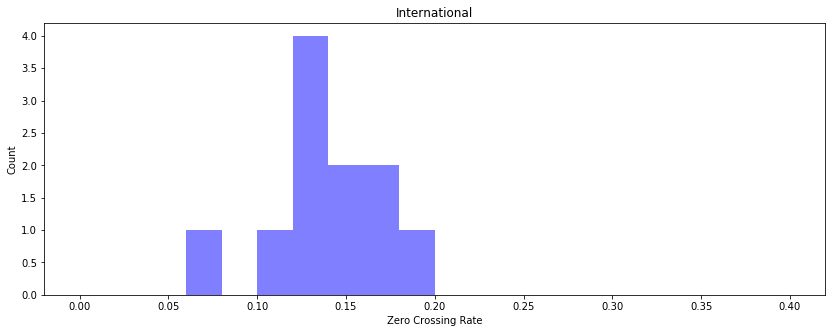

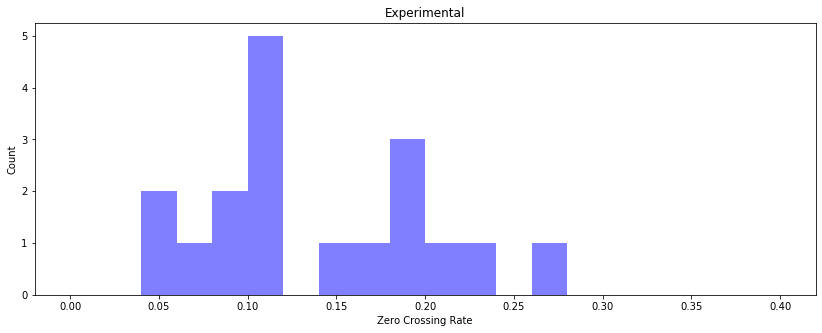

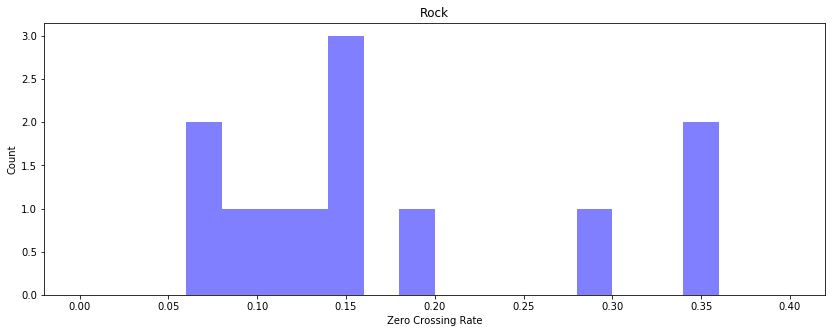

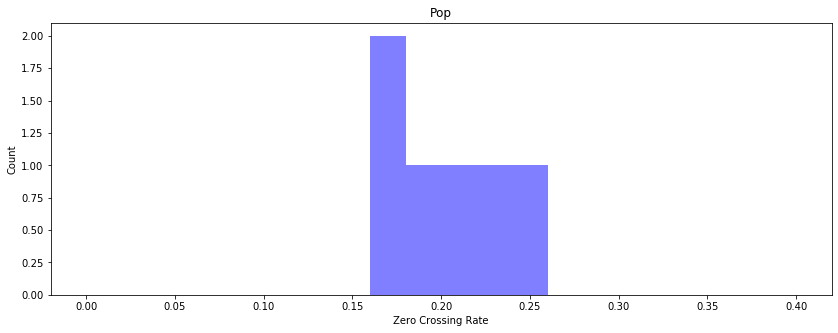

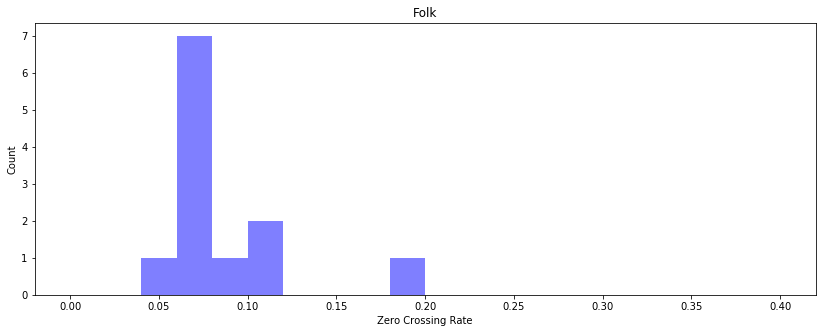

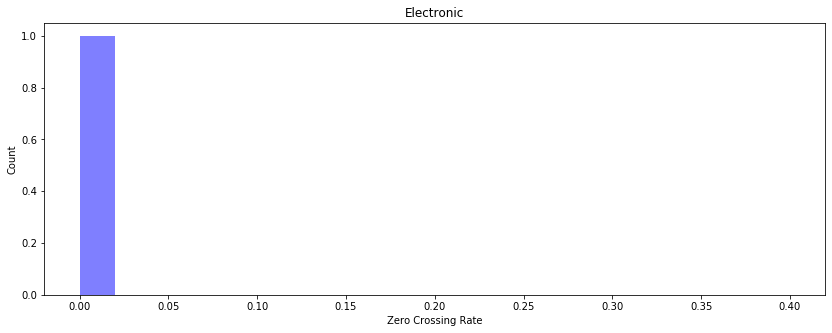

In [58]:
for genre in df_complete[('track', 'genre_top')].unique():
    plt.figure(figsize=(14, 5))
    df_genre = df_complete[df_complete[('track', 'genre_top')] == genre]
    plt.hist(df_genre['mean_zero_crossing_rate'], color='b', range=(0, 0.4), 
             alpha=0.5, bins=20)
    plt.xlabel('Zero Crossing Rate');
    plt.title(genre)
    plt.ylabel('Count');

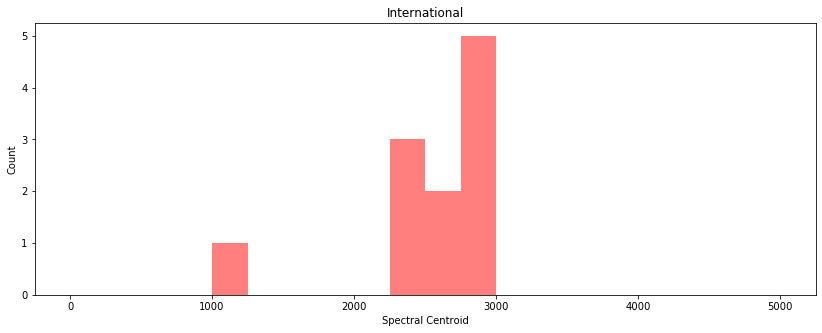

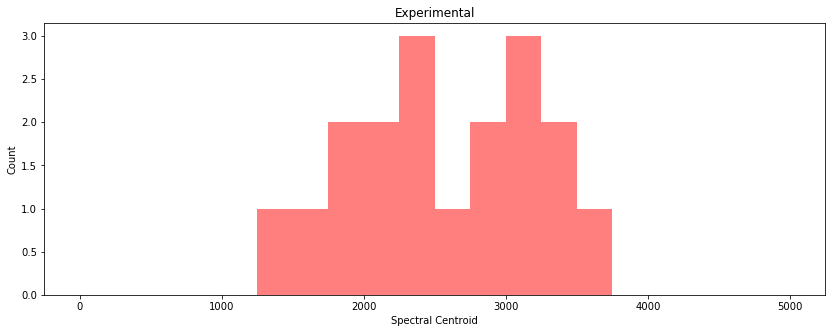

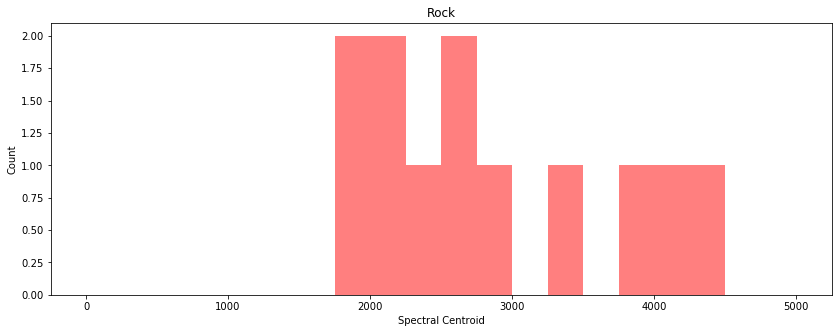

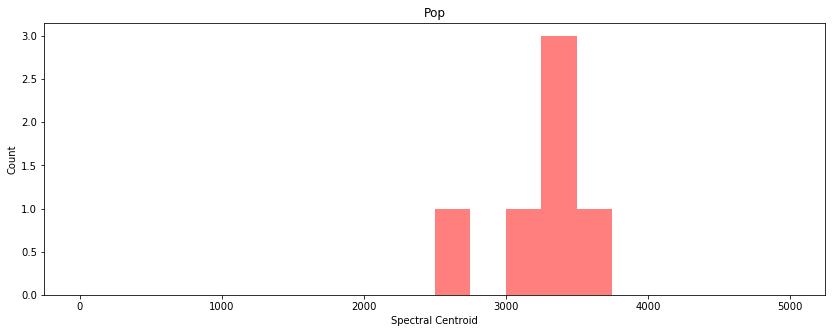

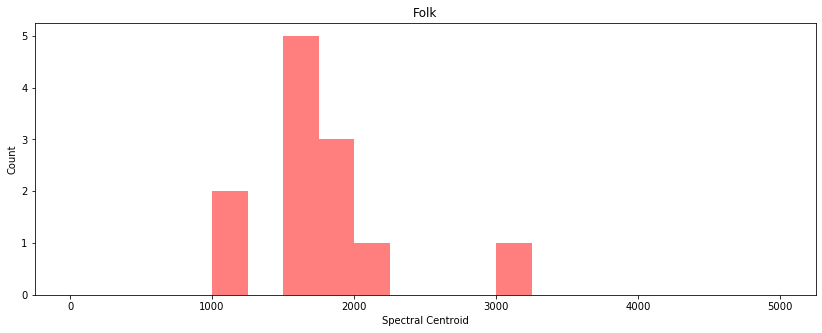

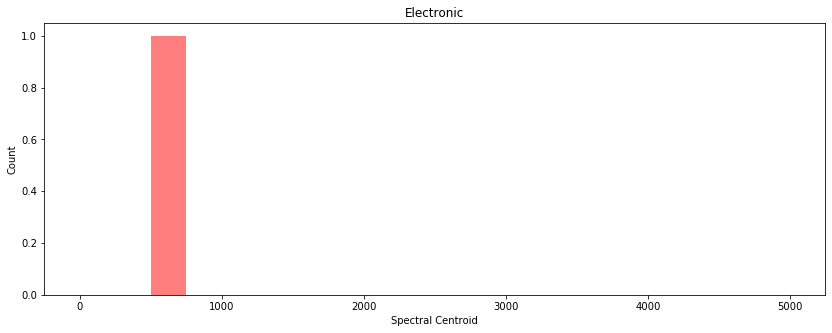

In [60]:
for genre in df_complete[('track', 'genre_top')].unique():
    plt.figure(figsize=(14, 5))
    df_genre = df_complete[df_complete[('track', 'genre_top')] == genre]
    plt.hist(df_genre['spectral_centroid'], color='r', range=(0, 5000), 
             alpha=0.5, bins=20)
    plt.xlabel('Spectral Centroid');
    plt.title(genre)
    plt.ylabel('Count');